#Gerencia de proyectos de analytics: Guía 4

##Características de calidad de los datos

Según la información de la documentación inicial del caso, se notó como la empresa cuenta con información comercial y con información técnica reportada por el medidor para cada uno de sus clientes no regulados.

Respecto a la información comercial, Electro Dunas cuenta con una base de datos que continene el número de identificación del cliente, el Departamento, la
Provincia, el Distrito, la Subestación, las Coordenadas de localización, entre otros (base de datos 1).

Además, la información técnica corresponde a los valores históricos de la energía acDva entregada1 (kWh), la energía reacDva entregada2 (kVarh) y el voltaje reportado cada 15 minutos por el medidor decada cliente (base de datos 2).

Se corroboran los datos alojados en el repositorio https://github.com/Pacheco-Carvajal/GPA-Data-ElectroDunas

Tal como se describe en el planteamiento inicial del problema, se cuenta con una primera base en el repositorio con el nombre "sector_economico_clientes.xlsx", esta base de datos enumera los clientes y su sector económico, a diferencia de lo planteado en la documentación inicial no se encuentra evidencia del departamento, distrito, subestación entre otros elementos mencionados.

Con respecto a la información técnica, se encuentran 30 archivos en formato CSV (archivos separados por comas) con la información técnica del cliente correspondiente al archivo, se tiene entonces la fecha en la que se tomó la medición, energía activa, energía reactiva, voltaje FA y voltaje FC. Si bien las bases de datos parecen coincidir con la información inicial reportada por la empresa es de resaltar que los intervalos de tiempo no corresponden a reportes hechos cada 15 minutos.

Mediante Excel, y usando la función xlookup se agrupan todas estas bases de datos en un mismo archivo que se utilizará para la realización de este proyecto.



In [ ]:
#Se importa el archivo mencionado anteriormente con el fin de proceder a su exploración.
import pandas as pd
df = pd.read_excel("Clientes consolidada.xlsx")
#Se imprime el dataframe resultante.
df

,Source.Name,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,CLIENTE,Proper,Sector Económico:
0,DATOSCLIENTE1.csv,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,DATOSCLIENTE1.csv,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
2,DATOSCLIENTE1.csv,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
3,DATOSCLIENTE1.csv,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
4,DATOSCLIENTE1.csv,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
...,...,...,...,...,...,...,...,...,...
463420,DATOSCLIENTE9.csv,2023-03-31 20:00:00,0.231000,0.309493,1343.358528,1288.567372,CLIENTE 9,Cliente 9,Cultivo de Árboles Frutales y Nueces
463421,DATOSCLIENTE9.csv,2023-03-31 21:00:00,0.041937,0.314091,1050.653622,1266.553989,CLIENTE 9,Cliente 9,Cultivo de Árboles Frutales y Nueces
463422,DATOSCLIENTE9.csv,2023-03-31 22:00:00,0.231000,0.266937,1104.985834,991.259378,CLIENTE 9,Cliente 9,Cultivo de Árboles Frutales y Nueces
463423,DATOSCLIENTE9.csv,2023-03-31 23:00:00,0.150296,0.312547,1284.048639,1091.283710,CLIENTE 9,Cliente 9,Cultivo de Árboles Frutales y Nueces


**Totalidad**

Como primer paso a la exploración de las características de los datos se comienza explorando la base de datos desde la dimensión de totalidad con el fin de corroborar que todos los campos de la base de datos estén correctos.

In [ ]:
#Se exploran si existen valores nulos en la base de datos.
df_info = df.isnull().sum()
print(df_info)

Source.Name          0
Fecha                0
Active_energy        0
Reactive_energy      0
Voltaje_FA           0
Voltaje_FC           0
CLIENTE              0
Proper               0
Sector Económico:    0
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463425 entries, 0 to 463424
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   Source.Name        463425 non-null  object        
 1   Fecha              463425 non-null  datetime64[ns]
 2   Active_energy      463425 non-null  float64       
 3   Reactive_energy    463425 non-null  float64       
 4   Voltaje_FA         463425 non-null  float64       
 5   Voltaje_FC         463425 non-null  float64       
 6   CLIENTE            463425 non-null  object        
 7   Proper             463425 non-null  object        
 8   Sector Económico:  463425 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 31.8+ MB


Desde la óptica de la dimensión de totalidad, puede primero observarse que se obtiene una base de datos total en forma de dataframe almacenada en la variable "df" con 463425 filas o registros y 9 columnas o dimensiones.

Luego, mediante la librería pandas y los atributos de exploración de dataframes, se explora un poco más a fondo la base de datos y puede observarse que no hay ningún valor faltante (o null) dentro de las columnas, es decir, cada una de las columnas cuenta con 463425 elementos.

Adicional a esto, también puede verificarse el tipo de datos que tiene cada columna de la siguiente forma:


*   Fecha: contiene la fecha y la hora en la cuál se hizo medición de las variables eléctricas mencionadas anteriormente para un determinado cliente, su formato es datetime64 ya que es una variable de tiempo.

*   Active_energy: contiene la energía activa registrada en esa medición el particular, su formato es float64 ya que es una variable decimal.

*   Reactive_energy: contiene la energía activa reactiva en esa medición el particular, su formato es float64 ya que es una variable decimal.

*   Voltaje_FA: contiene el voltaje FA registrado en esa medición en particular, su formato es float64 ya que es una variable decimal.

*   Voltaje_FC: contiene el voltaje FC registrado en esa medición en particular, su formato es float64 ya que es una variable decimal.

*   CLIENTE: Contiene el indicador del cliente al cual pertenece el registro, su formato es object ya que es una variable en forma de cadenas de texto.

*   Proper: Contiene el indicador del cliente al cual pertenece el registro, su formato es object ya que es una variable en forma de cadenas de texto.

*   Sector Económico: Contiene el sector económico del cliente al cual pertenece el registro, su formato es object ya que es una variable en forma de cadenas de texto.

In [ ]:
num_celdas_vacias = df.isin([""]).sum().sum()
num_celdas_vacias_por_columna = df.isin([""]).sum()
num_total_celdas_vacias_por_columna = num_celdas_vacias_por_columna.sum()

print(f"Número total de celdas vacías: {num_celdas_vacias}")
print(f"Número total de celdas vacías por columna: {num_total_celdas_vacias_por_columna}")


Número total de celdas vacías: 0
Número total de celdas vacías por columna: 0


Adicional al análisis anterior, se hace un análisis extra considerando la forma "" ya que es común encontrar bases de datos que python toma como si tuvieran datos pero realmente tienen cadenas de texto vacías, no es el caso para la base de datos ya que no se evidencia ningún elemento de la forma de cadena vacía "".

**Consistencia**

Se exploran los datos mediante las diferentes dimensiones con el fin de verificar que exista coherencia entre el sentido de un campo y la definición propia de los datos.

In [ ]:
# Verificar duplicados en fechas para el mismo cliente
duplicates = df[df.duplicated(subset=['CLIENTE ', 'Fecha'])]
print("Duplicados en fechas para el mismo cliente:")
print(duplicates)

Duplicados en fechas para el mismo cliente:
Empty DataFrame
Columns: [Source.Name, Fecha, Active_energy, Reactive_energy, Voltaje_FA, Voltaje_FC, CLIENTE , Proper, Sector Económico:]
Index: []


In [ ]:
# Verificar valores negativos en Active_energy y Reactive_energy
negative_energy = df[(df['Active_energy'] < 0) | (df['Reactive_energy'] < 0)]
print("Valores negativos en energía:")
negative_energy

Valores negativos en energía:


,Source.Name,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,CLIENTE,Proper,Sector Económico:
133780,DATOSCLIENTE17.csv,2021-11-09 15:00:00,-0.381904,0.382493,2077.430688,2093.655684,CLIENTE 17,Cliente 17,"Captación, tratamiento y distribución de agua"
133781,DATOSCLIENTE17.csv,2021-11-09 16:00:00,-0.408740,0.469523,2036.334551,2093.205889,CLIENTE 17,Cliente 17,"Captación, tratamiento y distribución de agua"
133789,DATOSCLIENTE17.csv,2021-11-10 00:00:00,-0.187803,0.392220,1950.083873,1951.344805,CLIENTE 17,Cliente 17,"Captación, tratamiento y distribución de agua"
133790,DATOSCLIENTE17.csv,2021-11-10 01:00:00,-0.455174,0.459796,1931.903407,1858.665907,CLIENTE 17,Cliente 17,"Captación, tratamiento y distribución de agua"
133791,DATOSCLIENTE17.csv,2021-11-10 02:00:00,-0.338941,0.390148,1910.706034,2064.042938,CLIENTE 17,Cliente 17,"Captación, tratamiento y distribución de agua"
...,...,...,...,...,...,...,...,...,...
216302,DATOSCLIENTE20.csv,2022-05-09 12:00:00,-0.457582,0.200000,2069.593516,2077.851435,CLIENTE 20,Cliente 20,"Captación, tratamiento y distribución de agua"
216303,DATOSCLIENTE20.csv,2022-05-09 13:00:00,-0.458964,1.484933,2078.795633,2073.401393,CLIENTE 20,Cliente 20,"Captación, tratamiento y distribución de agua"
216304,DATOSCLIENTE20.csv,2022-05-09 14:00:00,-0.427294,0.231000,2071.330458,2079.444732,CLIENTE 20,Cliente 20,"Captación, tratamiento y distribución de agua"
216305,DATOSCLIENTE20.csv,2022-05-09 15:00:00,-0.455775,0.200000,2039.538550,2088.843514,CLIENTE 20,Cliente 20,"Captación, tratamiento y distribución de agua"


In [ ]:
# Verificar valores negativos en Voltaje_FA y Voltaje_FC
negative_volt = df[(df['Voltaje_FA'] < 0) | (df['Voltaje_FC'] < 0)]
print("Valores negativos en voltaje:")
negative_volt

Valores negativos en voltaje:


,Source.Name,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,CLIENTE,Proper,Sector Económico:


In [ ]:
unique_clients = df['CLIENTE '].unique()
unique_proper = df['Proper'].unique()
unique_sectors = df['Sector Económico:'].unique()
print("Clientes únicos:", unique_clients)
print("Proper únicos:", unique_proper)
print("Sectores económicos únicos:", unique_sectors)

Clientes únicos: ['CLIENTE 1' 'CLIENTE 10' 'CLIENTE 11' 'CLIENTE 12' 'CLIENTE 13'
 'CLIENTE 14' 'CLIENTE 15' 'CLIENTE 16' 'CLIENTE 17' 'CLIENTE 18'
 'CLIENTE 19' 'CLIENTE 2' 'CLIENTE 20' 'CLIENTE 21' 'CLIENTE 22'
 'CLIENTE 23' 'CLIENTE 24' 'CLIENTE 25' 'CLIENTE 26' 'CLIENTE 27'
 'CLIENTE 28' 'CLIENTE 29' 'CLIENTE 3' 'CLIENTE 30' 'CLIENTE 4'
 'CLIENTE 5' 'CLIENTE 6' 'CLIENTE 7' 'CLIENTE 8' 'CLIENTE 9']
Proper únicos: ['Cliente 1' 'Cliente 10' 'Cliente 11' 'Cliente 12' 'Cliente 13'
 'Cliente 14' 'Cliente 15' 'Cliente 16' 'Cliente 17' 'Cliente 18'
 'Cliente 19' 'Cliente 2' 'Cliente 20' 'Cliente 21' 'Cliente 22'
 'Cliente 23' 'Cliente 24' 'Cliente 25' 'Cliente 26' 'Cliente 27'
 'Cliente 28' 'Cliente 29' 'Cliente 3' 'Cliente 30' 'Cliente 4'
 'Cliente 5' 'Cliente 6' 'Cliente 7' 'Cliente 8' 'Cliente 9']
Sectores económicos únicos: ['Elaboración de cacao y chocolate y de productos de confitería'
 'Cultivo de Árboles Frutales y Nueces'
 'Cultivo de otros frutos y nueces de árboles y arbustos'
 

In [ ]:
print(df['Fecha'].min(), df['Fecha'].max())


2021-01-01 00:00:00 2023-04-01 00:00:00


Con el fin de analizar la consistencia de los datos, se analizan varias columnas de la base de datos, primero, en la columna de fecha, se analiza que no existan fechas repetidas dentro de un mismo cliente lo cuál sería evidencia de conteos de energía repetidos, luego de hacer el análisis no se observa evidencia de esto.

Luego, ya que estamos analizando mediciones de energía, se procede a evaluar inconsistencias con respecto a mediciones erróneas de energía, para esto se analiza si existen valores negativos para las variables de energía activa y reactiva. Luego de hacer el respectivo análisis se encontraron 505 registros con elementos de energía negativos. Se hizo el mismo ejercicio para los voltajes, pero no se encontró evidencia de tener voltajes negativos en la base de datos.

Para evaluar la consistencia de las dimensiones de la base de datos se imprimen los valores únicos de las variables de texto con el fin de verificar algún error ortográfico o algún otro tipo de inconsistencia en estos registros, luego de explorar no se evidencia ninguna inconsistencia en estas variables.

Finalmente, se evaluan los valores mínimos y máximos de fecha con el fin de verificar que los rangos de la base de datos tengan sentido, se observan fechas entre 2021 y 2023 lo cuál parece realista.


**Claridad**

Se exploran los datos mediante las diferentes técnicas estadísticas con el fin de evaluar si estas generan resultados entendibles.

In [ ]:
# Estadísticas descriptivas para variables numéricas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Active_energy,463425.0,1.472050,1.718780,-1.329018,0.242788,0.810771,1.992488,14.622644
Reactive_energy,463425.0,0.873086,1.158846,0.000000,0.112832,0.380650,1.222834,11.135141
Voltaje_FA,463425.0,1420.188470,766.299118,0.031000,719.462874,1625.493463,2037.276385,4266.229746
Voltaje_FC,463425.0,1438.515836,746.447449,0.031000,748.148254,1634.696089,2040.554497,4399.038932


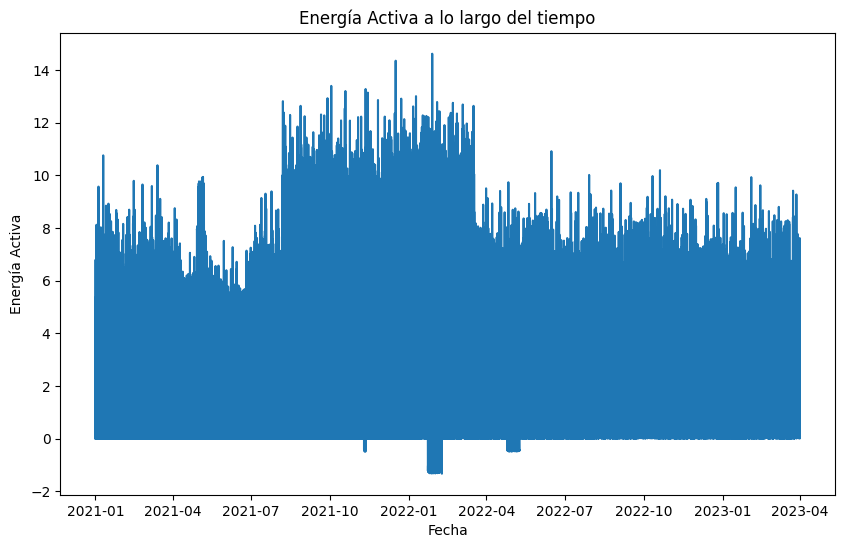

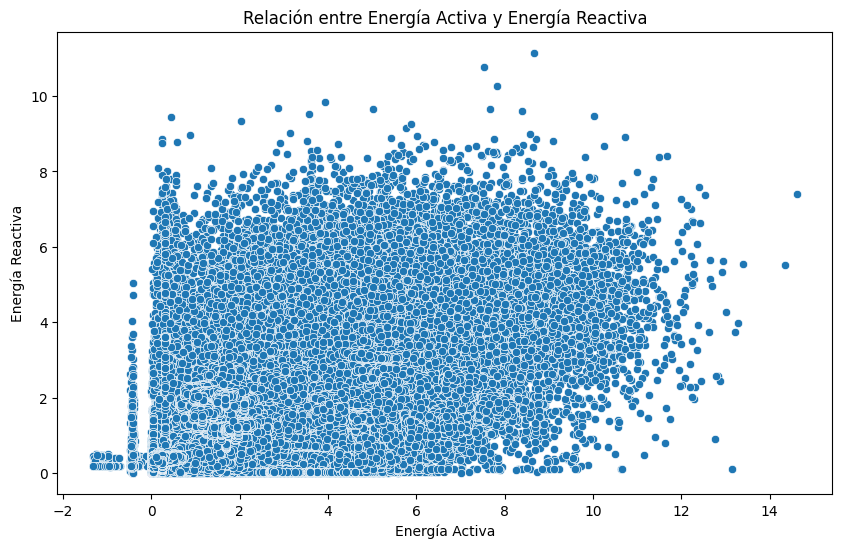

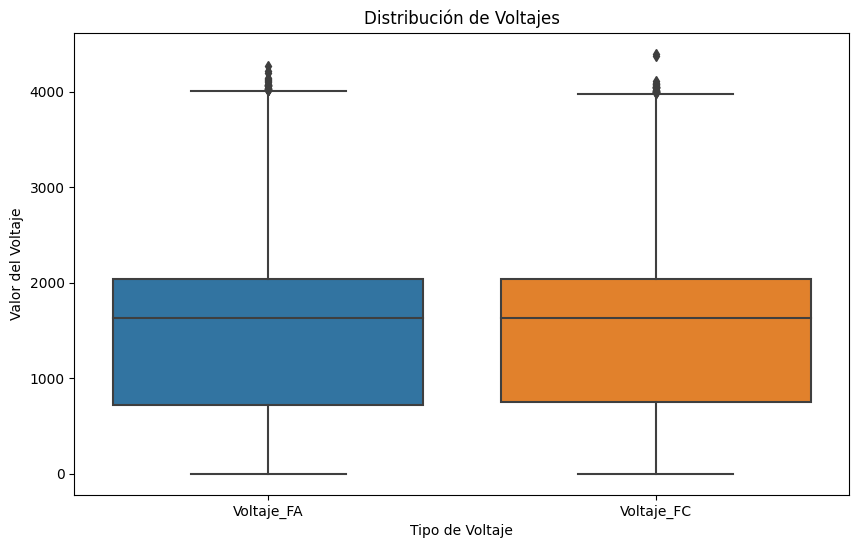

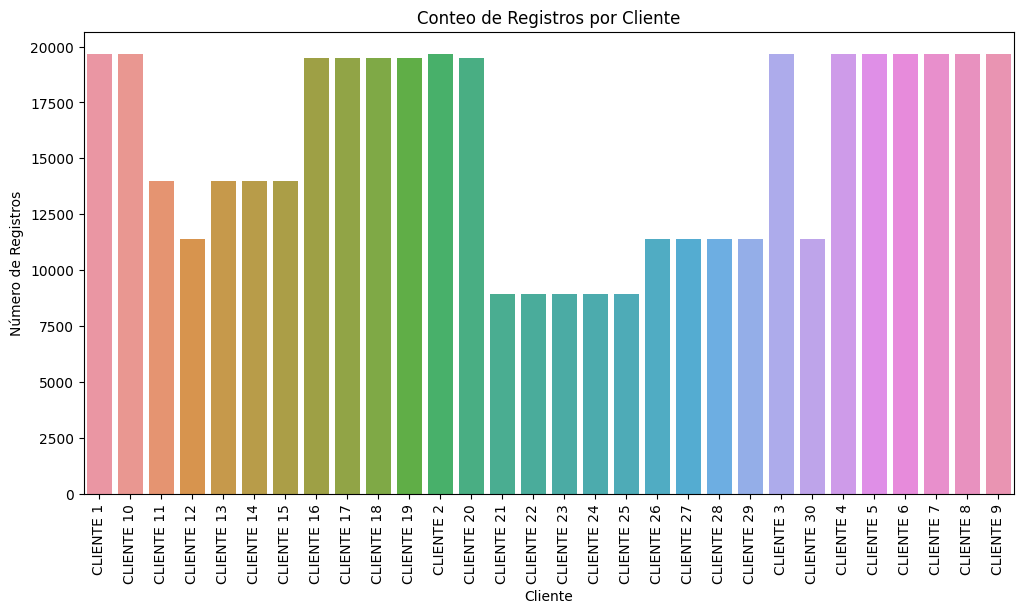

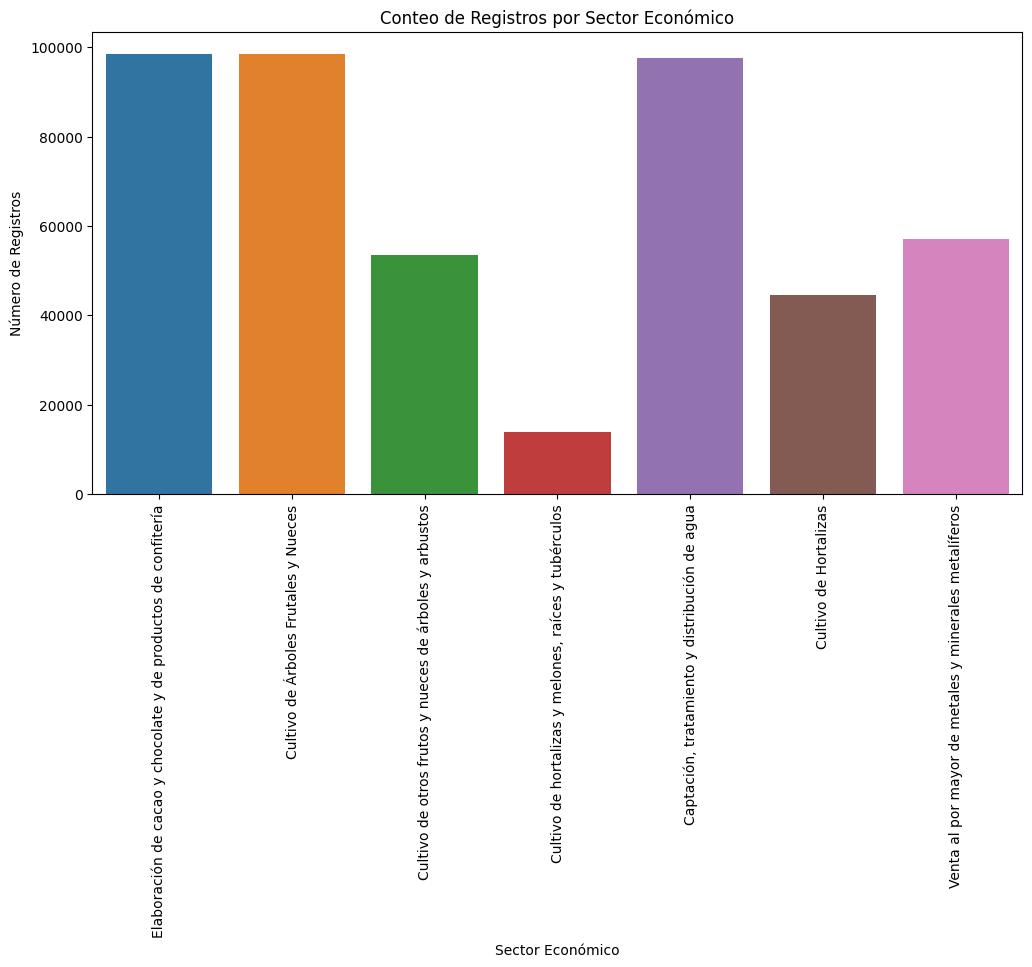

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Gráfico para la variable 'Fecha'
plt.figure(figsize=(10, 6))
plt.plot(df['Fecha'], df['Active_energy'])
plt.title('Energía Activa a lo largo del tiempo')
plt.xlabel('Fecha')
plt.ylabel('Energía Activa')
plt.show()

# Gráfico de dispersión para 'Active_energy' vs 'Reactive_energy'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Active_energy', y='Reactive_energy', data=df)
plt.title('Relación entre Energía Activa y Energía Reactiva')
plt.xlabel('Energía Activa')
plt.ylabel('Energía Reactiva')
plt.show()

# Boxplot para 'Voltaje_FA' y 'Voltaje_FC'
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Voltaje_FA', 'Voltaje_FC']])
plt.title('Distribución de Voltajes')
plt.xlabel('Tipo de Voltaje')
plt.ylabel('Valor del Voltaje')
plt.show()

# Gráfico de barras para 'CLIENTE'
plt.figure(figsize=(12, 6))
sns.countplot(x='CLIENTE ', data=df)
plt.title('Conteo de Registros por Cliente')
plt.xlabel('Cliente')
plt.ylabel('Número de Registros')
plt.xticks(rotation=90)
plt.show()

# Gráfico de barras para 'Sector Económico'
plt.figure(figsize=(12, 6))
sns.countplot(x='Sector Económico:', data=df)
plt.title('Conteo de Registros por Sector Económico')
plt.xlabel('Sector Económico')
plt.ylabel('Número de Registros')
plt.xticks(rotation=90)
plt.show()


<ipython-input-12-14ce913a9819>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


                 Active_energy  Reactive_energy  Voltaje_FA  Voltaje_FC
Active_energy         1.000000         0.641789   -0.240723   -0.239892
Reactive_energy       0.641789         1.000000   -0.150958   -0.158293
Voltaje_FA           -0.240723        -0.150958    1.000000    0.954814
Voltaje_FC           -0.239892        -0.158293    0.954814    1.000000


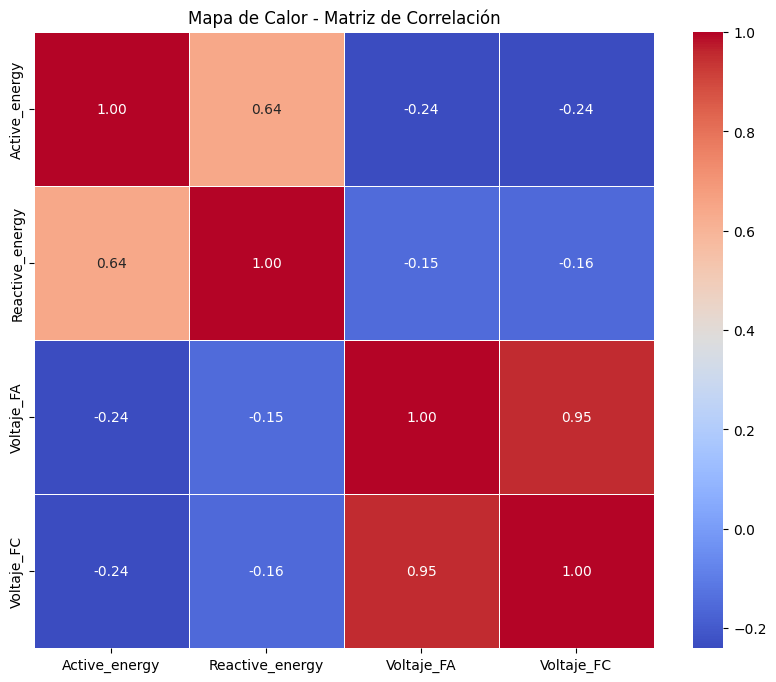

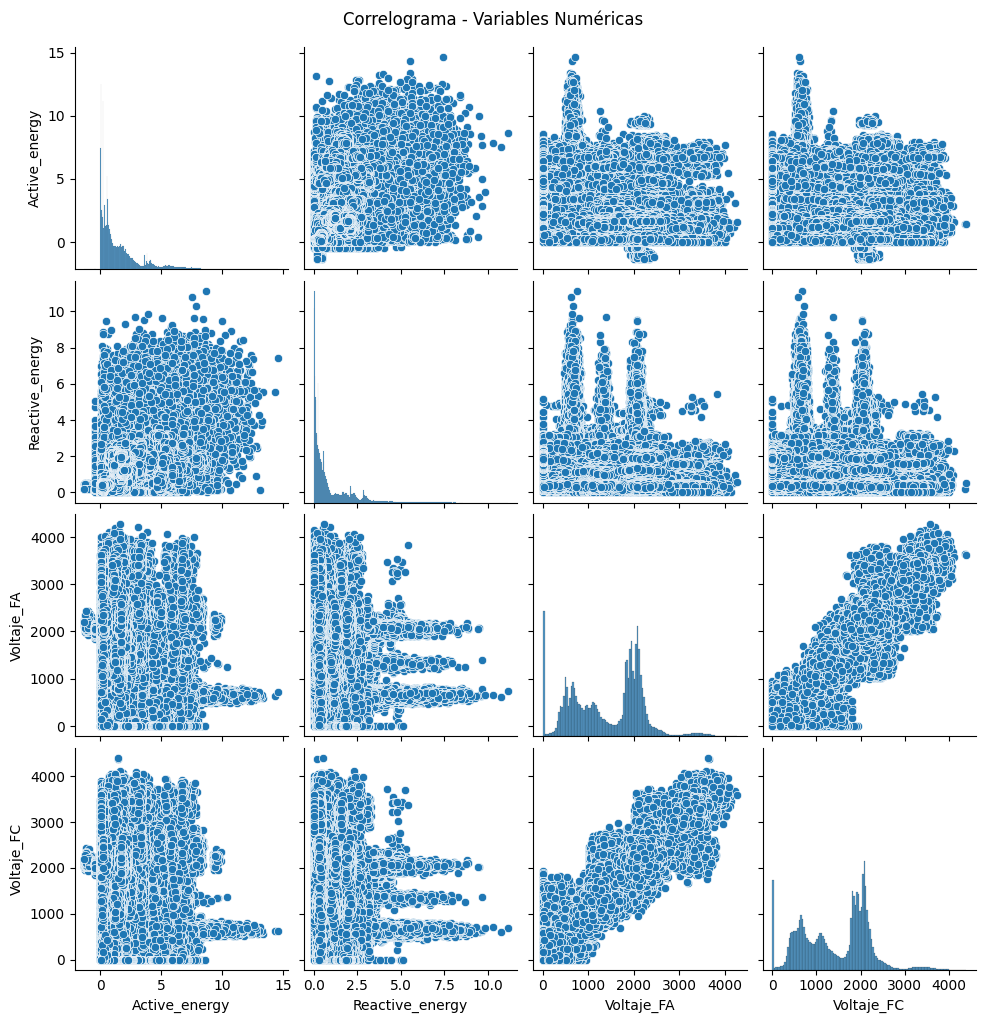

In [ ]:
# Matriz de correlación
correlation_matrix = df.corr()
print(correlation_matrix)
# Mapa de calor para la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor - Matriz de Correlación')
plt.show()

# Correlograma (Pairplot) para variables numéricas
numeric_variables = ['Active_energy', 'Reactive_energy', 'Voltaje_FA', 'Voltaje_FC']
sns.pairplot(df[numeric_variables])
plt.suptitle('Correlograma - Variables Numéricas', y=1.02)
plt.show()

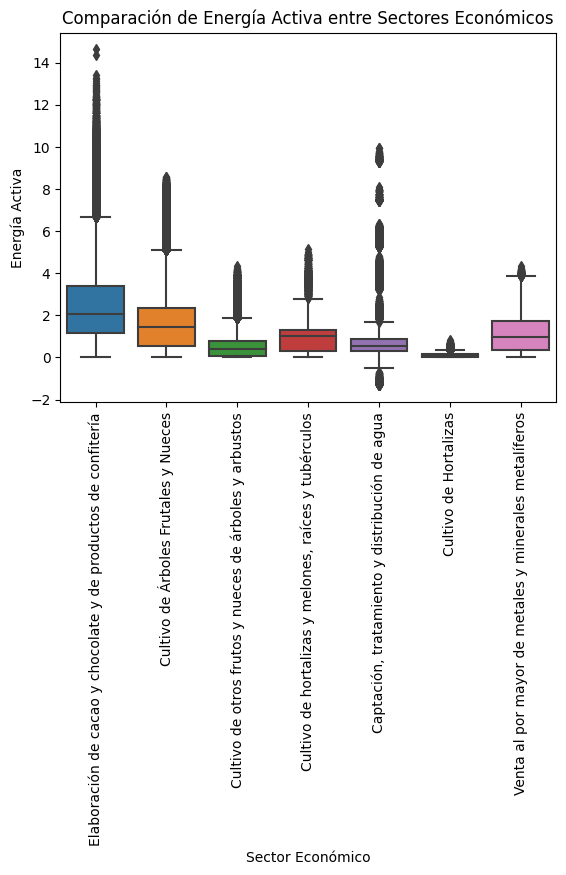

In [ ]:
# Boxplot comparativo entre sectores económicos y energía activa
sns.boxplot(x='Sector Económico:', y='Active_energy', data=df)
plt.xlabel('Sector Económico')
plt.ylabel('Energía Activa')
plt.title('Comparación de Energía Activa entre Sectores Económicos')
plt.xticks(rotation=90)
plt.show()

Con el fin de analizar la claridad de los datos se exploran las diferentes columnas mediante diferentes técnicas estadísticas con el fin de evaluar si estas generan resultados entendibles.

Primero, se realiza un análisis de estadísticas descriptivas básicas mediante la función “.describe()” de la librería pandas. Puede observarse entonces un cuadro resultante con las estadísticas descriptivas básicas en el dataframe, se observa que por ejemplo para la columna de energía activa existen 463425 registros, la media de la energía activa dentro de la base de datos es de 1.472050 con una desviación estándar de 1.718780 lo cuál nos da una idea de la variabilidad de los datos con respecto a su media, se encuentra un valor mínimo de energía activa de -1.329018 lo cuál evidencia la conclusión anterior sobre la inconsistencia de valores negativos dentro de la energía, la tabla también nos indica un valor máximo de energía activa de 14.622644 con percentiles del 25%, 50% y 75% con valores de 0.242788, 0.810771 y 1.992488 lo cual brinda una idea de la distribución de los valores de la energía activa alrededor de la base de datos, este mismo análisis estadístico es extensivo a las otras dimensiones numéricas.

Luego, se realizan diferentes visualizaciones básicas con el fin de corroborar la calidad de las dimensiones desde una perspectiva visual:


*   Se realiza un gráfico de series de tiempo con respecto al tiempo y la energía activa, acá puede evidenciasen anormalidades al finalizar 2021, alrededor de febrero de 2022 y alrededor de mayo de 2022 ya que pueden observarse valores de energía negativos.

*   Se realiza un gráfico de dispersión entre la energía activa y la energía reactiva, se observa un comportamiento disperso entre ámbas variables, sin aparentes patrones o formaciones de patrones en la gráfica y con el mismo análisis de elementos negativos atípicos dentro de la energía activa.

*   Se hacen boxplots para comparar la distribución de los tipos de voltajes, ambos parecen tener distribuciones de voltaje similares dentro de sus percentiles, pueden apreciarse valores atípicos de voltajes altos.

*   Se hace un conteo de registros por cliente mediante un gráfico de barras donde puede apreciarse el balance de registros por cliente, se puede apreciar como algunos clientes como el número 21 tienen alrededor de 8000 registros mientras otros el cliente 2 tienen alrededor de 20000 registros, esto debe considerarse particularmente al momento de hacer modelos de machine learning.

*   Similar al análisis del gráfico anterior se hace un conteo de registros por sector económico mediante gráficos de barras con el fin de explorar esta dimensión, puede apreciarse el desbalance con algunos sectores económicos, por ejemplo el cultivo de hortalizas, melones, raíces y tubérculos tiene alrededor de 17000 registros mientras que el cultivo de árboles frutales y nueces tiene alrededor de 98000 registros, al igual que se observó con el gráfico anterior, esto debe considerarse particularmente al momento de hacer modelos de machine learning.

Luego se realiza una matriz de correlación, un mapa de calor y un correlograma con el fin de analizar de forma gráfica los resultados de la matriz de correlación, pueden entonces apreciarse algunas relaciones lineales fuertes entre las variables, por ejemplo, los voltajes FA y FC tienen una alta correlación positiva con un valor de 0.95, también se aprecia una alta correlación positiva entre la energía reactiva y la energía activa con un valor de 0.64. Estos resultados pueden apreciarse gráficamente en el correlograma donde puede observarse la formación casi lineal entre estas variables.

Finalmente, se realizan boxplots con cada uno de los sectores económicos con respecto a la energía activa, puede observarse una alta variablidad en cuanto a la distribución de energía activa a lo largo de los percentiles según su sector, también se observa la presencia de valores atípicos con respecto a valores altos de energía activa en todas las categorías.


In [ ]:
print(df['Fecha'].min(), df['Fecha'].max())


2021-01-01 00:00:00 2023-04-01 00:00:00


**Formato**

Los datos ya han sido explorados desde mútiples perspectivas y puede concluirse en este aparte que el formato es correcto, los datos son coherentes para el estudio a realizar, los datos de fecha se encuentran en formato de datetime, los valores numérivos correspondientes a tipos de energía o voltajes son de tipo decimal mientras que los sectores y tipos de cliente corresponden a variables de tipo objeto ya que contienen cadenas de caracteres.

##Proceso de limpieza de datos

In [ ]:
#Se eliminan los registros con valores de energía negativos:
common_columns = set(df.columns) & set(negative_energy.columns)
df = pd.merge(df, negative_energy, on=list(common_columns), how='left', indicator=True).query('_merge == "left_only"').drop('_merge', axis=1)
df

,Source.Name,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,CLIENTE,Proper,Sector Económico:
0,DATOSCLIENTE1.csv,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,DATOSCLIENTE1.csv,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
2,DATOSCLIENTE1.csv,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
3,DATOSCLIENTE1.csv,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
4,DATOSCLIENTE1.csv,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,CLIENTE 1,Cliente 1,Elaboración de cacao y chocolate y de producto...
...,...,...,...,...,...,...,...,...,...
463420,DATOSCLIENTE9.csv,2023-03-31 20:00:00,0.231000,0.309493,1343.358528,1288.567372,CLIENTE 9,Cliente 9,Cultivo de Árboles Frutales y Nueces
463421,DATOSCLIENTE9.csv,2023-03-31 21:00:00,0.041937,0.314091,1050.653622,1266.553989,CLIENTE 9,Cliente 9,Cultivo de Árboles Frutales y Nueces
463422,DATOSCLIENTE9.csv,2023-03-31 22:00:00,0.231000,0.266937,1104.985834,991.259378,CLIENTE 9,Cliente 9,Cultivo de Árboles Frutales y Nueces
463423,DATOSCLIENTE9.csv,2023-03-31 23:00:00,0.150296,0.312547,1284.048639,1091.283710,CLIENTE 9,Cliente 9,Cultivo de Árboles Frutales y Nueces


In [ ]:
#Se eliminan columnas redundantes y se resetea el index
df = df.drop(['Source.Name','CLIENTE ' ], axis=1)
df = df.reset_index(drop=True)
df

,Fecha,Active_energy,Reactive_energy,Voltaje_FA,Voltaje_FC,Proper,Sector Económico:
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1,Elaboración de cacao y chocolate y de producto...
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1,Elaboración de cacao y chocolate y de producto...
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1,Elaboración de cacao y chocolate y de producto...
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1,Elaboración de cacao y chocolate y de producto...
...,...,...,...,...,...,...,...
462915,2023-03-31 20:00:00,0.231000,0.309493,1343.358528,1288.567372,Cliente 9,Cultivo de Árboles Frutales y Nueces
462916,2023-03-31 21:00:00,0.041937,0.314091,1050.653622,1266.553989,Cliente 9,Cultivo de Árboles Frutales y Nueces
462917,2023-03-31 22:00:00,0.231000,0.266937,1104.985834,991.259378,Cliente 9,Cultivo de Árboles Frutales y Nueces
462918,2023-03-31 23:00:00,0.150296,0.312547,1284.048639,1091.283710,Cliente 9,Cultivo de Árboles Frutales y Nueces


In [ ]:
#Se renombras las columnas
# Se crea un diccionario de mapeo para los nuevos nombres de las columnas
nuevos_nombres = {'Active_energy': 'Energía_Activa', 'Reactive_energy': 'Energía_Reactiva','Proper': 'Cliente', 'Sector Económico:': 'Sector Económico',}
# Se renombrar las columnas utilizando el método rename
df.rename(columns=nuevos_nombres, inplace=True)
df

,Fecha,Energía_Activa,Energía_Reactiva,Voltaje_FA,Voltaje_FC,Cliente,Sector Económico
0,2021-01-01 00:00:00,0.357841,0.282788,455.139171,510.561002,Cliente 1,Elaboración de cacao y chocolate y de producto...
1,2021-01-01 01:00:00,0.372264,0.431377,469.978787,469.917178,Cliente 1,Elaboración de cacao y chocolate y de producto...
2,2021-01-01 02:00:00,1.044687,0.338626,468.721120,546.949147,Cliente 1,Elaboración de cacao y chocolate y de producto...
3,2021-01-01 03:00:00,0.566425,0.495791,452.329255,444.122989,Cliente 1,Elaboración de cacao y chocolate y de producto...
4,2021-01-01 04:00:00,1.080556,0.472018,513.477596,535.463719,Cliente 1,Elaboración de cacao y chocolate y de producto...
...,...,...,...,...,...,...,...
462915,2023-03-31 20:00:00,0.231000,0.309493,1343.358528,1288.567372,Cliente 9,Cultivo de Árboles Frutales y Nueces
462916,2023-03-31 21:00:00,0.041937,0.314091,1050.653622,1266.553989,Cliente 9,Cultivo de Árboles Frutales y Nueces
462917,2023-03-31 22:00:00,0.231000,0.266937,1104.985834,991.259378,Cliente 9,Cultivo de Árboles Frutales y Nueces
462918,2023-03-31 23:00:00,0.150296,0.312547,1284.048639,1091.283710,Cliente 9,Cultivo de Árboles Frutales y Nueces


Para el proceso de limpieza de datos, se comienza por eliminar los registros con valores negativos de energía hallados en el proceso anterior ya que no tiene sentido tener valores de energía negativa en nuestra base de datos, así se eliminan 505 registros.

Luego, se puede observar que hay columnas redundantes ya que  'Source.Name', 'CLIENTE ' y ‘Proper’ hacen referencia a los mismos datos (identificador del cliente), por lo cuál se eliminan las columnas 'Source.Name' y 'CLIENTE ' conservando solo ‘Proper’ ya que es la que conserva el nombre de los clientes de una forma visual y gramatical más adecuada, también en este paso se resetea el index del dataframe con el fin de tener ids ordenados según nuestro número total de registros.

Finalmente, se renombran las etiquetas de las columnas ya que algunas estaban en español y otras en inglés, se pasa todo a español con el fin de generar mayor armonía en la base de datos.


##Proceso de entendimiento de datos

**cálculo de eficiencia energetica**

In [ ]:
def calcular_eficiencia_energetica(registro):
    energia_activa = registro["Energía_Activa"]
    energia_reactiva = registro["Energía_Reactiva"]

    # Calcula la potencia aparente
    potencia_aparente = energia_activa + energia_reactiva

    # Verifica si la potencia aparente es cero para evitar la división por cero
    if potencia_aparente != 0:
        eficiencia_energetica = (energia_activa / potencia_aparente) * 100
    else:
        eficiencia_energetica = 0  # o cualquier otro valor que consideres adecuado para estos casos

    return eficiencia_energetica

In [ ]:
# Calcula la eficiencia energética de cada registro
eficiencia_energetica = []
for registro in df.iterrows():
    eficiencia_energetica.append(calcular_eficiencia_energetica(registro[1]))

df['eficiencia_energetica'] = eficiencia_energetica

Eficiencia energética = (Energía activa / Potencia aparente) * 100

En esta fórmula, la energía activa es la energía que se utiliza para realizar un trabajo útil, mientras que la potencia aparente es la potencia total que se consume.


La eficiencia energética es una variable importante que debemos calcular y añadir a nuestro proyecto porque nos permite evaluar el desempeño energético de los clientes e identificar oportunidades de mejora.


La eficiencia energética mide la relación entre la energía activa consumida y la potencia aparente consumida. La energía activa es la energía que se utiliza para realizar un trabajo útil, mientras que la potencia aparente es la potencia total que se consume.


Un cliente con una eficiencia energética alta es aquel que consume menos energía para realizar un trabajo útil. Esto significa que el cliente está utilizando su energía de manera más eficiente, lo que puede reducir sus costes energéticos y su impacto ambiental.

La eficiencia energética es una variable importante para nuestro proyecto porque nos permite:

- Comparar el desempeño energético de diferentes clientes. Esto nos puede ayudar a identificar clientes con una eficiencia energética baja, que podrían ser candidatos para programas de eficiencia energética.

- Identificar oportunidades de mejora en la eficiencia energética. Esto nos puede ayudar a desarrollar programas de eficiencia energética que sean efectivos y que tengan un impacto positivo en los clientes y en la empresa.

**Energía Total Consumida**

In [ ]:
def calcular_energia_total_consumida(registro):
    energia_activa = registro["Energía_Activa"]
    energia_reactiva = registro["Energía_Reactiva"]

    energia_total_consumida = energia_activa + energia_reactiva

    return energia_total_consumida

In [ ]:
# Calcula la energía total consumida de cada registro
energia_total_consumida = []
for registro in df.iterrows():
    energia_total_consumida.append(calcular_energia_total_consumida(registro[1]))

df['energia_total_consumida'] = energia_total_consumida

La energía total consumida se calcula sumando la energía activa consumida y la energía reactiva consumida. La energía activa es la energía que se utiliza para realizar un trabajo útil, mientras que la energía reactiva es la energía que se utiliza para crear un campo magnético.

Para calcular la energía total consumida, podemos utilizar la siguiente fórmula:

**Energía total consumida = Energía activa consumida + Energía reactiva consumida**

La energía total consumida es una variable importante que debemos calcular y añadir a nuestro proyecto porque nos permite:

- Comparar el consumo de energía de diferentes clientes. Esto nos puede ayudar a identificar clientes con un consumo de energía alto, que podrían ser candidatos para programas de eficiencia energética.
- Identificar tendencias en el consumo de energía. Esto nos puede ayudar a planificar la capacidad de la red eléctrica y a desarrollar políticas energéticas.
- Evaluar el impacto ambiental de la empresa. El consumo de energía es una de las principales fuentes de emisiones de gases de efecto invernadero.


**Calidad de la energía**

In [ ]:
import pandas as pd

# Suponiendo que 'df' es tu DataFrame

# Calculando el Factor de Potencia (FP)
df['Energía_Aparente'] = df['Energía_Activa']**2 + df['Energía_Reactiva']**2
df['Factor_de_Potencia'] = df['Energía_Activa'] / df['Energía_Aparente']

# Calculando la Desviación de Voltaje
df['Desviación_Voltaje'] = abs(df['Voltaje_FA'] - df['Voltaje_FC'])

# Agrupando por cliente y calculando los valores promedio por cliente
resultados_por_cliente = df.groupby('Cliente').agg({
    'Factor_de_Potencia': 'mean',
    'Desviación_Voltaje': 'mean'
}).reset_index()

# Imprimiendo los resultados por cliente
print(resultados_por_cliente)


       Cliente  Factor_de_Potencia  Desviación_Voltaje
0    Cliente 1            0.662030           47.848932
1   Cliente 10            0.349064          139.134524
2   Cliente 11            5.868753           37.939068
3   Cliente 12            0.897496           92.779426
4   Cliente 13            3.714082           86.727431
5   Cliente 14            5.681399           36.059843
6   Cliente 15            2.071874           36.059843
7   Cliente 16            1.580623           41.996960
8   Cliente 17            1.291950           83.082479
9   Cliente 18            1.061163           87.572209
10  Cliente 19            1.128700           36.732393
11   Cliente 2            0.269072           94.824363
12  Cliente 20            0.403039           36.699131
13  Cliente 21            8.356660          165.391140
14  Cliente 22            3.187110          218.513852
15  Cliente 23            1.935506          227.094555
16  Cliente 24            5.119519          175.339837
17  Client

####Segmentar los datos y encontrar agrupaciones:

In [ ]:
from sklearn.cluster import KMeans

def k_means(df, k):
    # Inicializa el modelo de clusterización
    modelo = KMeans(n_clusters=k)

    # Entrena el modelo
    modelo.fit(df[['energia_total_consumida', 'eficiencia_energetica']])

    # Obtiene los grupos de datos
    grupos = modelo.predict(df[['energia_total_consumida', 'eficiencia_energetica']])

    return grupos


grupos = k_means(df.copy(), 4)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


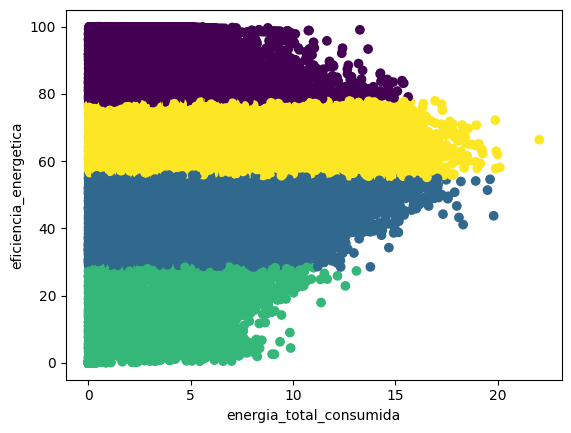

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(df["energia_total_consumida"], df["eficiencia_energetica"], c=grupos)
plt.xlabel("energia_total_consumida")
plt.ylabel("eficiencia_energetica")
plt.show()

Para llevar a cabo la segmentación de datos, se ha optado por la implementación de un modelo de clusterización conocido como KMeans. Este modelo posibilita la agrupación de datos según sus similitudes. En este escenario, se emplearán dos variables previamente calculadas: la energía total consumida y la eficiencia energética. La elección de estas variables apunta a identificar agrupaciones que compartan niveles similares de consumo de energía y eficiencia.



La determinación del número de grupos se basará en la magnitud de los datos y en los objetivos específicos del análisis. En el contexto del proyecto de Electro Dunas, el propósito central radica en identificar oportunidades de mejora en la eficiencia energética de los clientes. Tras evaluar los resultados de las posibles agrupaciones, se ha establecido que el número óptimo de clústers es 4, lo que representa segmentos que contienen aproximadamente el 25% de los registros totales.

###Descripción Estadística Básica

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Energía_Activa,462920.0,1.474491,1.718085,0.000000,0.244981,0.812400,1.994143,14.622644
Energía_Reactiva,462920.0,0.873460,1.159194,0.000000,0.112592,0.380994,1.224194,11.135141
Voltaje_FA,462920.0,1419.424795,766.361982,0.031000,718.894696,1620.991371,2036.493964,4266.229746
Voltaje_FC,462920.0,1437.782860,746.518650,0.031000,747.500206,1630.797063,2039.985717,4399.038932
eficiencia_energetica,462920.0,59.965814,24.859382,0.000000,47.995294,60.768844,78.735243,99.999979
energia_total_consumida,462920.0,2.347951,2.617838,0.000000,0.495856,1.326978,3.282312,22.023913
Energía_Aparente,462920.0,7.232596,15.029982,0.000000,0.152199,1.089090,6.551441,268.600507
Factor_de_Potencia,447907.0,1.769533,4.011231,0.000262,0.273082,0.707327,1.510909,275.614938
Desviación_Voltaje,462920.0,123.744181,192.765173,0.000000,26.817268,65.628107,143.576411,1938.027309


- La energía activa promedio es de 1.474491 kWh, con una desviación estándar de 1.718085 kWh. Esto significa que la mayoría de los valores de energía activa se encuentran entre 1.244981 kWh y 1.994143 kWh. El valor mínimo es de 0 kWh, lo que indica que en algunos casos no se consumió energía activa.

- La energía reactiva promedio es de 0.873460 kWh, con una desviación estándar de 1.159194 kWh. Esto significa que la mayoría de los valores de energía reactiva se encuentran entre 0.112592 kWh y 1.224194 kWh. El valor mínimo es de 0 kWh, lo que indica que en algunos casos no se consumió energía reactiva.

- El voltaje promedio en la fase A es de 1419.424795 V, con una desviación estándar de 766.361982 V. Esto significa que la mayoría de los valores de voltaje en la fase A se encuentran entre 718.894696 V y 2036.493964 V. El valor mínimo es de 0.031 V, lo que indica que en algunos casos el voltaje en la fase A fue muy bajo.

- El voltaje promedio en la fase B es de 1437.782860 V, con una desviación estándar de 746.518650 V. Esto significa que la mayoría de los valores de voltaje en la fase B se encuentran entre 747.500206 V y 2039.985717 V. El valor mínimo es de 0.031 V, lo que indica que en algunos casos el voltaje en la fase B fue muy bajo.

- La eficiencia energética promedio es de 59.965814 %, con una desviación estándar de 24.859382 %. Esto significa que la mayoría de los valores de eficiencia energética se encuentran entre 47.995294 % y 78.735243 %. El valor mínimo es de 0 %, lo que indica que en algunos casos la eficiencia energética fue muy baja.

- La energía total consumida promedio es de 2.347951 kWh, con una desviación estándar de 2.617838 kWh. Esto significa que la mayoría de los valores de energía total consumida se encuentran entre 0.495856 kWh y 3.282312 kWh. El valor mínimo es de 0 kWh, lo que indica que en algunos casos no se consumió energía total.

- La energía aparente promedio es de 7.232596 kVA, con una desviación estándar de 15.029982 kVA. Esto significa que la mayoría de los valores de energía aparente se encuentran entre 0.152199 kVA y 6.551441 kVA. El valor mínimo es de 0 kVA, lo que indica que en algunos casos no se consumió energía aparente.

- El factor de potencia promedio es de 1.769533, con una desviación estándar de 4.011231. Esto significa que la mayoría de los valores de factor de potencia se encuentran entre 0.273082 y 2.756149. El valor mínimo es de 0.000262, lo que indica que en algunos casos el factor de potencia fue muy bajo.

- La desviación de voltaje promedio es de 123.744181 V, con una desviación estándar de 192.765173 V. Esto significa que la mayoría de los valores de desviación de voltaje se encuentran entre 26.817268 V y 1938.027309 V. El valor mínimo es de 0 V, lo que indica que en algunos casos la desviación de voltaje fue muy baja.



In [ ]:
# Segmentar por días y agrupar los datos
df_por_dia = df.groupby(df['Cliente']).agg({'energia_total_consumida': 'sum', 'eficiencia_energetica': 'mean'})

df_por_dia

,energia_total_consumida,eficiencia_energetica
Cliente,,
Cliente 1,56609.026024,66.150617
Cliente 10,84219.634820,83.400819
Cliente 11,11479.687235,88.051907
Cliente 12,22027.395163,57.198617
Cliente 13,16013.737958,77.715926
Cliente 14,3648.743940,61.129047
Cliente 15,10924.565171,55.189441
Cliente 16,42293.954681,53.457403
Cliente 17,45437.823155,51.410096


In [ ]:
df_por_dia = df.groupby(df['Sector Económico']).agg({'energia_total_consumida': 'sum', 'eficiencia_energetica': 'mean'})

df_por_dia

,energia_total_consumida,eficiencia_energetica
Sector Económico,,
"Captación, tratamiento y distribución de agua",243771.763400,48.197765
Cultivo de Hortalizas,10348.583998,36.396475
"Cultivo de hortalizas y melones, raíces y tubérculos",16013.737958,77.715926
Cultivo de otros frutos y nueces de árboles y arbustos,48080.391509,65.788781
Cultivo de Árboles Frutales y Nueces,244241.101620,68.993047
Elaboración de cacao y chocolate y de productos de confitería,427716.858766,63.450788
Venta al por mayor de metales y minerales metalíferos,96740.986639,67.016614


Estos resultados muestran la cantidad total de energía consumida y la eficiencia energética promedio en diferentes sectores económicos.

- Captación, tratamiento y distribución de agua: Este sector ha consumido una considerable cantidad de energía, indicando la demanda energética asociada a las operaciones de tratamiento y distribución de agua. La eficiencia energética, aunque no es la más alta en comparación con otros sectores, aún muestra una eficiencia razonable en el uso de la energía.

- Cultivo de Hortalizas: El consumo de energía en este sector es menor en comparación con otros, lo que podría deberse a la naturaleza de las actividades agrícolas. La eficiencia energética parece estar en el rango medio.

- Cultivo de hortalizas y melones, raíces y tubérculos: Similar al cultivo de hortalizas, el consumo de energía es moderado, pero la eficiencia energética es considerablemente alta en este caso, posiblemente debido a prácticas más eficientes en el manejo de energía.

- Cultivo de otros frutos y nueces de árboles y arbustos: Este sector tiene un consumo de energía moderado con una eficiencia energética razonablemente alta, lo que sugiere prácticas más eficientes en comparación con otros sectores agrícolas.

- Cultivo de Árboles Frutales y Nueces: Muestra un alto consumo de energía, probablemente debido a las demandas energéticas asociadas con la agricultura intensiva. A pesar del alto consumo, la eficiencia energética es relativamente alta, lo que puede ser indicativo de prácticas más eficientes en el uso de la energía en este sector.

- Elaboración de cacao y chocolate y de productos de confitería: Presenta un alto consumo de energía, lo que es comprensible debido a las demandas energéticas en los procesos de elaboración. La eficiencia energética es razonablemente alta, lo que sugiere un manejo relativamente eficiente de la energía.

- Venta al por mayor de metales y minerales metalíferos: Este sector muestra un consumo de energía considerable, probablemente debido a las operaciones intensivas asociadas con la manipulación y el procesamiento de metales. La eficiencia energética es alta, lo que indica una gestión efectiva de la energía a pesar del alto consumo.

En general, se observa una variabilidad en el consumo de energía y la eficiencia energética entre los diferentes sectores, lo que sugiere diferentes necesidades y prácticas en la gestión de energía en cada uno.

In [ ]:
1

1

Fuentes:
https://www.atcp-ndt.com/es/soporte/faq_trz/455-que-son-los-parametros-fa-za-fr-zr-y-fc.html
